1.Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью 
функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, 
при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [6]:
from sklearn.datasets import load_boston

In [7]:
boston=load_boston()
X=pd.DataFrame(boston['data'], columns=boston["feature_names"])
y=pd.DataFrame( boston["target"], columns=["price"])

In [8]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler= StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,  columns=boston["feature_names"] )
pd.options.display.float_format = '{:,.5f}'.format
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.00000,404.00000,404.00000,404.00000,404.00000,404.00000,404.00000,404.00000,404.00000,404.00000,404.00000,404.00000,404.00000
mean,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000
std,1.00124,1.00124,1.00124,1.00124,1.00124,1.00124,1.00124,1.00124,1.00124,1.00124,1.00124,1.00124,1.00124
min,-0.40614,-0.50032,-1.48779,-0.27809,-1.45871,-3.46173,-2.34821,-1.25839,-0.97405,-1.30768,-2.56894,-3.89225,-1.51056
25%,-0.39798,-0.50032,-0.85027,-0.27809,-0.88878,-0.60035,-0.82283,-0.80820,-0.62436,-0.75336,-0.68210,0.20988,-0.80051
50%,-0.37767,-0.50032,-0.35217,-0.27809,-0.15723,-0.14944,0.32702,-0.29712,-0.50780,-0.44607,0.17147,0.38300,-0.21578
75%,-0.04582,0.36459,1.03324,-0.27809,0.63386,0.45282,0.89747,0.74820,0.30814,1.57843,0.84534,0.43166,0.55131
max,9.63069,3.82423,2.43316,3.59597,2.67539,3.47756,1.12458,3.90790,1.70689,1.84957,1.65399,0.44418,3.59253


Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [16]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [17]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


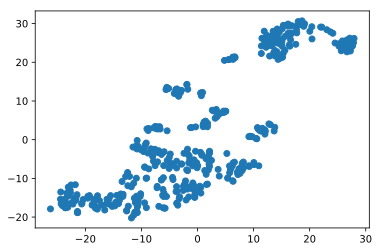

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

2.С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, 
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [19]:
from sklearn.cluster import KMeans

In [21]:
km=KMeans(n_clusters=3, max_iter=100, random_state=42)

In [34]:
labels_train = km.fit_predict(X_train_scaled)


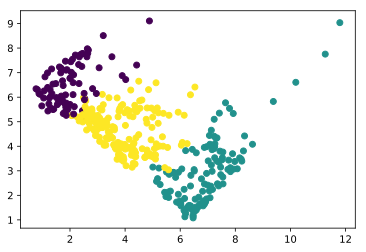

In [35]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)


In [36]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


In [38]:
print('Кластер 0: {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_train.loc[labels_train == 2, 'price'].mean()))

Кластер 0: 27.788372093023252
Кластер 1: 16.165354330708666
Кластер 2: 24.958115183246072


3.Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. 
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [43]:
l=km.predict(X_valid)
print('Кластер 0: {}'.format(X_valid.loc[l== 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_valid.loc[l == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_valid.loc[l == 2, 'CRIM'].mean()))

Кластер 0: 0.024126666666666668
Кластер 1: 3.8563730208333333
Кластер 2: nan


In [45]:
print('Кластер 0: {}'.format(y_valid.loc[l== 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_valid.loc[l == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_valid.loc[l == 2, 'price'].mean()))

Кластер 0: 40.53333333333334
Кластер 1: 20.297916666666673
Кластер 2: nan
